In [433]:
# pip install tensorflow

In [24]:
# Importing needed libraries/modules

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# sklearn for pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#From random forest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
import sklearn

# TensorFlow sequential model
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [25]:
train_data = pd.read_csv("data11.csv")
train_data.tail()

,Unnamed: 0,Hold 0,Hold 1,Hold 2,Hold 3,Hold 4,Hold 5,Hold 6,Hold 7,Hold 8,...,Quadrant 10,Quadrant 4,Quadrant 13,Quadrant 0,Quadrant 11,Quadrant 12,Quadrant 2,total_Sloper,Quadrant 14,Hold 310
850,850,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
851,851,0,0,4,0,0,0,0,0,0,...,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
852,852,0,0,0,4,0,0,0,0,0,...,0.0,0.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0
853,853,0,0,0,0,0,0,0,0,4,...,2.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0
854,854,0,0,0,0,0,0,0,0,0,...,3.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0


In [3]:
train_data = train_data.loc[:, train_data.columns != "Unnamed: 0"]
train_data = train_data.loc[:, train_data.columns != "name"]
train_data = train_data.loc[:, train_data.columns != "filepath"]
train_data = train_data.loc[:, train_data.columns != "campus"]

y = train_data["grade"]

train_data = train_data.loc[:, train_data.columns != "grade"]

X = train_data
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
#Function to make neural network

def make_net(number_features, 
             hidden_layers=3, 
             hidden_layer_neurones=128, 
             dropout=0.0, 
             learning_rate=0.001):
    
    """Make TensorFlow neural net"""
    
    # Clear Tensorflow 
    K.clear_session()
    
    # Set up neural net
    net = Sequential()
    
    # Add hidden hidden_layers using a loop
    for i in range(hidden_layers):
        # Add fully connected layer with ReLu activation
        net.add(Dense(
            hidden_layer_neurones, 
            input_dim=number_features,
            activation='leaky_relu'))
        # Add droput layer
        net.add(Dropout(dropout))
    
    # Add final sigmoid activation output
    net.add(Dense(1, activation='linear'))    
    
    # Compiling model
    opt = Adam(learning_rate=learning_rate)
    
    net.compile(loss='mean_squared_error', 
                optimizer=opt, 
                metrics=['mean_squared_error'])
    
    
    
    
#     NN_model = Sequential()

#     # The Input Layer :
#     NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

#     # The Hidden Layers :
#     NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#     NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#     NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

#     # The Output Layer :
#     NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#     # Compile the network :
#     NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
#     NN_model.summary()
    
    return net

In [5]:
#Function to scale data from 0 - 1

def scale_data(X_train, X_test):
    """Scale data 0-1 based on min and max in training set"""
    
    # Initialise a new scaling object for normalising input data
    sc = MinMaxScaler()

    # Set up the scaler just on the training set
    sc.fit(X_train)

    # Apply the scaler to the training and test sets
    train_sc = sc.transform(X_train)
    test_sc = sc.transform(X_test)
    
    return train_sc, test_sc

In [6]:
# # Split data
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size = 0.25, random_state=42)

# Scale X data
X_train_sc, X_test_sc = scale_data(X_train, X_validation)
y_test = y_validation
# X_train_sc = X_train
# X_test_sc = X_validation

In [7]:
#Function to calculate accuracy for troubleshooting / optimizing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

def calculate_accuracy(RandomizedSearch, X_train_sc, X_test_sc, y_train, y_test):
    """Calculate and print accuracy of trainign and test data fits"""    
    
    train_MSE = mean_squared_error(y_train.values, RandomizedSearch.predict(X_train_sc))
    train_EVS = explained_variance_score(y_train.values, RandomizedSearch.predict(X_train_sc))
    
    test_MSE = mean_squared_error(y_test.values, RandomizedSearch.predict(X_test_sc))
    test_EVS = explained_variance_score(y_test.values, RandomizedSearch.predict(X_test_sc))
    
    print(f"train MSE {train_MSE}")
    print(f"train EVS {train_EVS}")
    print(f"test MSE {test_MSE}")
    print(f"test EVS {test_EVS}")
    
    
#     ### Get accuracy of fit to training data
#     probability = model.predict(X_train_sc)
#     y_pred_train = probability >= 0.5
#     y_pred_train = y_pred_train.flatten()
#     accuracy_train = np.mean(y_pred_train == y_train)
    
#     ### Get accuracy of fit to test data
#     probability = model.predict(X_test_sc)
#     y_pred_test = probability >= 0.5
#     y_pred_test = y_pred_test.flatten()
#     accuracy_test = np.mean(y_pred_test == y_test)

#     # Show acuracy
#     print (f'Training accuracy {accuracy_train:0.3f}')
#     print (f'Test accuracy {accuracy_test:0.3f}')

In [8]:
#Function to Visualize Accuracy

def plot_training(history_dict):
    acc_values = history_dict['mean_squared_error']
    val_acc_values = history_dict['val_mean_squared_error']
    epochs = range(1, len(acc_values) + 1)

    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [9]:
#Final Neural Network 

# Define save checkpoint callback (only save if new best validation results)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'model_checkpoint.h5', save_best_only=True)

# Define early stopping callback
# Stop when no validation improvement for 25 epochs
# Restore weights to best validation accuracy
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=25, restore_best_weights=True)

number_features = X_train_sc.shape[1]
model = make_net(
    number_features,
    hidden_layers=4,
    hidden_layer_neurones=16,
    dropout=0.2)




In [10]:
# define the learning rate change 
def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate

In [11]:
epochs = 50
learning_rate = 0.1 # initial learning rate
decay_rate = 0.1
momentum = 0.8

In [12]:
from keras.callbacks import History
from keras.callbacks import LearningRateScheduler
# learning schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lr_rate]

In [13]:
# history = model.fit(X_train_sc,
#                     y_train,
#                     epochs=50,
#                     batch_size=32,
#                     validation_data=(X_test_sc, y_test),
#                     verbose=0, 
#                     callbacks=[checkpoint_cb, early_stopping_cb])

In [14]:
history = model.fit(X_train_sc,
                    y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_test_sc, y_test),
                    verbose=0, 
                    callbacks=callbacks_list,)

In [15]:
# Show acuracy
calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

train MSE 0.7826490320542547
train EVS 0.8493020011706218
test MSE 2.728825223442793
test EVS 0.5291685904932817


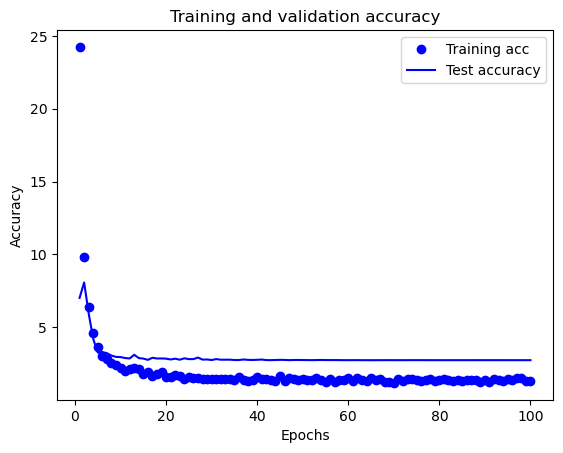

In [16]:
# Plot accuracy
plot_training(history.history)

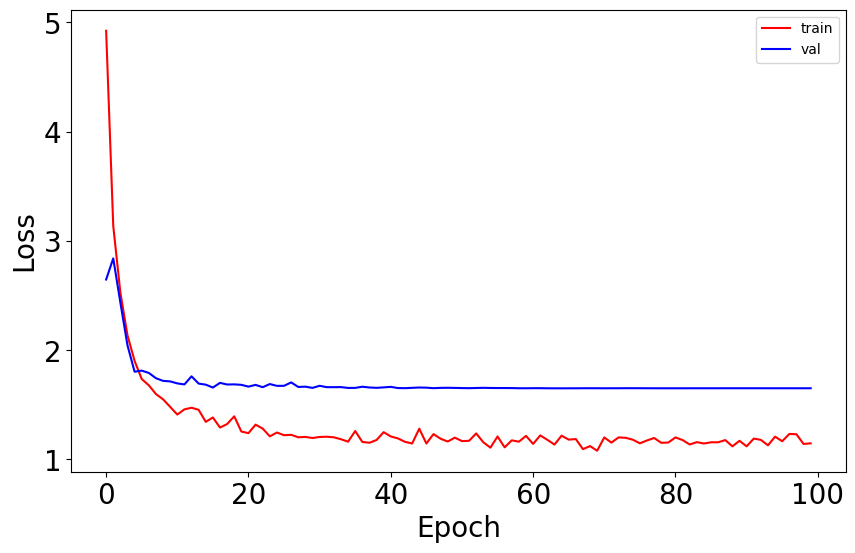

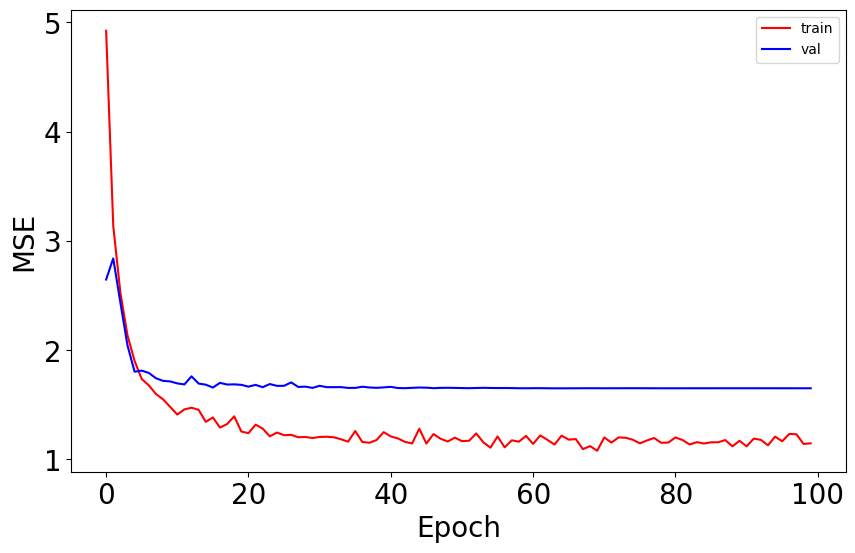

In [17]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mean_squared_error']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mean_squared_error']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [18]:
RandomizedSearch = model

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train.values, RandomizedSearch.predict(X_train_sc))

0.7826490320542547

In [20]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_train.values, RandomizedSearch.predict(X_train_sc))

0.8493020011706218

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_validation.values, RandomizedSearch.predict(X_test_sc))

2.728825223442793

In [22]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_validation.values, RandomizedSearch.predict(X_test_sc))

0.5291685904932817

In [23]:
# # Format Output data & Submit it

# test_data['Survived'] = [ round(x) for x in test_data['Survived']] 
# solution = test_data[['PassengerId', 'Survived']]
# solution.to_csv("Neural_Network_Solution.csv", index=False)